### well structured - an ode to databases


# data preparation

### import libraries

In [175]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## build stock preparation class

In [176]:
class stock_prep:
    def __init__(self, company_name):

        # load data
        self.company_stock_prices = pd.read_csv('data/' + company_name)[['Date', 'Close']] #input genauere Beschreibung
        self.company_name = company_name

        # return dfs
        self.replace_company_stock_prices = []
        self.avg_norm_loss_company_stock_prices = []
        self.formatted_date_to_index = []
        self.standardization_company_stock_prices = []
        self.normalization_company_stock_prices = []
        self.binning_company_stock_prices = []
        self.indicator_variables_stock_prices = []

    def pipeline_conductor(self,pipeline):
        pass

    def replace_values(self):
        #print(self.company_stock_prices.head(5))
        self.replace_company_stock_prices = self.company_stock_prices.replace("?", np.nan)
        #print(self.replace_company_stock_prices.head(5))

    def missing_values_count(self):
        self.missing_company_stock_prices = self.replace_company_stock_prices.isnull()
        #print(self.missing_company_stock_prices.head(5))

        for column in self.missing_company_stock_prices.columns.values.tolist():
            print(column)
            print (self.missing_company_stock_prices[column].value_counts()) 

    def avg_norm_loss(self):
        avg_norm_loss = self.replace_company_stock_prices["Close"].astype("float").mean(axis=0)
        #print("Average of normalized-losses:", avg_norm_loss)
        self.avg_norm_loss_company_stock_prices = pd.concat([self.replace_company_stock_prices['Date'], self.replace_company_stock_prices['Close'].replace(np.nan, avg_norm_loss)], axis=1)
        #print(self.avg_norm_loss_company_stock_prices.head(5))

    def format_date_to_index(self):
        self.formatted_date_to_index = pd.concat([self.avg_norm_loss_company_stock_prices['Date'].str.replace('-', '', regex=True).astype(np.int64), self.avg_norm_loss_company_stock_prices['Close'].astype(np.float64)], axis=1)
        #print(self.formatted_date_to_index.head(5))
        #print(self.formatted_date_to_index.dtypes)

    def standardization(self):
        # currency dollar euro
        self.standardization_company_stock_prices = pd.concat([self.formatted_date_to_index['Date'], (self.formatted_date_to_index['Date']/self.formatted_date_to_index["Close"]).rename("Close")], axis=1)
        #print(self.standardization_company_stock_prices.head(5))
        
    def normalization(self):
        # replace (original value) by (original value)/(maximum value)
        self.normalization_company_stock_prices = pd.concat([self.formatted_date_to_index['Date'], (self.standardization_company_stock_prices['Close']/self.standardization_company_stock_prices['Close'].max()).rename("Close")], axis=1)
        #print(self.normalization_company_stock_prices.head(5))
        
    def binning(self):
        # build bins
        bins = np.linspace(min(self.normalization_company_stock_prices["Close"]), max(self.normalization_company_stock_prices["Close"]), 4)
        group_names = ["Low", "Medium", "High"]
        self.binning_company_stock_prices = pd.concat([self.formatted_date_to_index['Date'], (pd.cut(self.normalization_company_stock_prices['Close'], bins, labels = group_names, include_lowest= True)).rename("Close_binned")], axis=1)
        #print(self.binning_company_stock_prices.head(5))

    def plot_bins(self):

        plt.hist(self.binning_company_stock_prices["Close_binned"], bins = 3)
       
        plt.xlabel("Date")
        plt.ylabel("Close")
        plt.title("Close_Price")

    def indicator_variables(self):
        dummy_variable_1 = pd.get_dummies(self.binning_company_stock_prices["Close_binned"])
        dummy_variable_1.rename(columns={'Low':'close_price_low', 'Medium':'close_price_medium', 'High':'close_price_high'}, inplace=True)
        self.indicator_variables_stock_prices = pd.concat([self.binning_company_stock_prices['Date'], dummy_variable_1], axis=1)
        self.indicator_variables_stock_prices = self.indicator_variables_stock_prices.drop(["close_price_low"], axis = 1)
        #print(self.indicator_variables_stock_prices.head(5))

    def to_sqlite_database(self):
        conn = sqlite3.connect('stocks_prep.db')
        self.data['Close'].to_sql(name=self.company_name, con=conn, if_exists='replace')
        conn.commit()
        conn.close() 

In [177]:
stock_prep_obj = stock_prep('iShares Global Timber & Forestry UCITS ETF USD Acc.csv')

## identify and handling missing values

In [178]:
#replace missing values
stock_prep_obj.replace_values()

In [179]:
#identify missing values
stock_prep_obj.missing_values_count()

Date
Date
False    609
Name: count, dtype: int64
Close
Close
False    608
True       1
Name: count, dtype: int64


In [180]:
#handling missing values
stock_prep_obj.avg_norm_loss()

## correct dataformat

In [181]:
stock_prep_obj.format_date_to_index()

## data standardization

In [182]:
stock_prep_obj.standardization()


# normalization

In [183]:
stock_prep_obj.normalization()

## binning

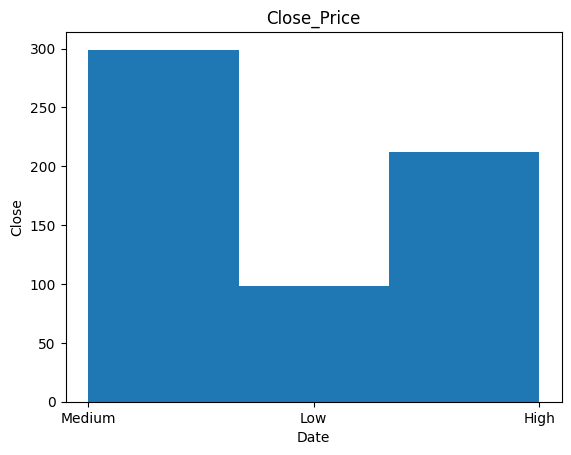

In [184]:
stock_prep_obj.binning()
stock_prep_obj.plot_bins()

## indicator Variables

In [185]:
stock_prep_obj.indicator_variables()

# store data in sqlite db

In [186]:
#ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
file_names = os.listdir('data/')
#print(file_names)

for file_name in file_names:
    print(file_name)
    stock_prep_obj = stock_prep(file_name)

    #replace missing values
    stock_prep_obj.replace_values()
    
    #identify missing values
    stock_prep_obj.missing_values_count()
    
    #handling missing values
    stock_prep_obj.avg_norm_loss()

        #data_format
    stock_prep_obj.format_date_to_index()

    #data standardization
    stock_prep_obj.standardization()

    #data normalization
    stock_prep_obj.normalization()

    #binning
    stock_prep_obj.binning()
    #stock_prep_obj.plot_bins()

    #indicator variables
    stock_prep_obj.indicator_variables()

    #data in sqlite database
    #stock_prep_obj.to_sqlite_database()


iShares Global Timber & Forestry UCITS ETF USD Acc.csv
Date
Date
False    609
Name: count, dtype: int64
Close
Close
False    608
True       1
Name: count, dtype: int64
Weyerhaeuser Company.csv
Date
Date
False    605
Name: count, dtype: int64
Close
Close
False    605
Name: count, dtype: int64
Svenska Cellulosa Aktiebolaget SCA (publ).csv
Date
Date
False    610
Name: count, dtype: int64
Close
Close
False    610
Name: count, dtype: int64
Suzano S.A..csv
Date
Date
False    605
Name: count, dtype: int64
Close
Close
False    605
Name: count, dtype: int64
Smurfit Kappa Group Plc.csv
Date
Date
False    614
Name: count, dtype: int64
Close
Close
False    614
Name: count, dtype: int64
International Paper Company.csv
Date
Date
False    605
Name: count, dtype: int64
Close
Close
False    605
Name: count, dtype: int64
Stora Enso Oyj.csv
Date
Date
False    609
Name: count, dtype: int64
Close
Close
False    609
Name: count, dtype: int64
Rayonier Inc..csv
Date
Date
False    605
Name: count, dtype: int64